In [1]:
#测试GPU可用性
import tensorflow as tf
print('GPU可用性:',tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU可用性: True


由于数据集分为trainmap和traindata两个类别，其中traindata为甲基化数据，trainmap为特征标签数据；因此我们需要预处理traindata数据，具体包括数据结构转化、缺失数据处理、甲基化数据与类别数据拼接.

In [2]:
#数据读取
import numpy as np
import pandas as pd
#本次取50000条数据
chunks=50000
traindata = pd.read_csv('/mnt/workspace/Data/train_dataset/traindata.csv', nrows=chunks)    #读取训练集
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')

In [3]:
#获取基因ID
CG_ID=traindata.iloc[:chunks,0]

In [4]:
#数据预处理函数
#预处理训练集
traindata = traindata.set_index('cpgsite')
traindata = traindata.T
traindata = traindata.reset_index()
traindata = traindata.rename(columns={'index':'sample_id'})
traindata.columns = ['sample_id'] + [i for i in range(chunks)]

In [5]:
traindata.to_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [6]:
#加载预处理后的数据
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')
traindata = pd.read_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [7]:
#拼接CG编号
CG_ID_str=['sample_id']+list(CG_ID)
traindata.columns=CG_ID_str
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001         NaN         NaN         NaN         NaN         NaN  \
1  train10002         NaN         NaN         NaN         NaN         NaN   
2  train10003         NaN         NaN         NaN         NaN         NaN   
3  train10004         NaN         NaN         NaN         NaN         NaN   
4  train10005    1.136022   -4.489850         NaN   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007         NaN         NaN         NaN         NaN         NaN   
7  train10008    1.475799   -3.993781         NaN   -4.051632    1.475799   
8  train10009         NaN         NaN         NaN         NaN         NaN   
9  train10010    1.515914   -4.051632         NaN   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19321603   
0         NaN         NaN         NaN         NaN  ...    3.374769  \
1         NaN         NaN         NaN         NaN  ...    2.511081   
2         NaN         NaN         NaN         NaN  ...    2.324893   
3   -1.398461         NaN         NaN         NaN  ...    3.543689   
4   -2.901295   -4.585271    2.804368    2.985388  ...    2.401172   
5   -3.100385   -5.093549    2.767818    1.848299  ...    2.300497   
6         NaN         NaN         NaN         NaN  ...    2.648415   
7   -3.314031   -4.807960    2.785946    2.196336  ...    2.496772   
8         NaN         NaN         NaN         NaN  ...    2.218738   
9   -2.681278   -4.112908    3.406479    2.069693  ...    2.196336   

   cg19326232  cg19331040  cg19342109  cg19343088  cg19343809  cg19348622   
0   -5.492861   -3.201956   -2.414368   -2.698069   -2.942546   -4.402578  \
1   -4.247583   -3.659672   -2.218738   -2.823096   -2.804368   -3.175661   
2   -4.585271   -3.343970   -2.288480   -2.767818   -2.767818   -3.701353   
3   -4.940737   -3.314031   -2.585369   -3.007447   -4.247583   -2.861514   
4   -4.489850   -3.228904   -2.312634   -2.963760   -2.963760   -3.507691   
5   -4.247583   -3.284902   -2.131436   -3.100385   -3.149987   -3.744756   
6   -4.178048   -3.938986   -2.511081   -3.149987   -2.985388   -3.543689   
7   -5.093549   -3.314031   -2.585369   -3.007447   -2.749976   -3.837361   
8   -4.807960   -2.942546   -2.427712   -2.861514   -2.963760   -3.472874   
9   -3.659672   -3.175661   -2.100192   -2.804368   -2.749976   -3.701353   

   cg19349217  cg19349369  cg19350197  
0   -3.201956   -1.185564    2.253116  
1   -3.659672   -1.765757    2.511081  
2   -2.454856   -1.213659    1.765757  
3   -2.942546   -1.856830    2.207487  
4   -4.247583   -1.749816    2.264792  
5   -3.201956   -1.294708    2.185284  
6   -3.406479   -1.703036    2.767818  
7   -3.790034   -0.699002    2.468664  
8   -2.881228   -1.865415    2.570129  
9   -3.007447   -1.749816    2.163468  

[10 rows x 50001 columns]

In [8]:
#统计数据空缺值
traindata_null=traindata.isnull().sum().sum()    #统计前4万个特征缺失值
data_sum=traindata.shape[0]*traindata.shape[1]
traindata_null_rate=traindata_null/data_sum    #计算特征缺失率
print('训练数据缺失数据量为:{0},数据总量为:{1}'.format(traindata_null,data_sum))
print('训练数据缺失率为:{0}%'.format(round(traindata_null_rate*100,4)))

训练数据缺失数据量为:23688484,数据总量为:411658233
训练数据缺失率为:5.7544%


In [9]:
#缺失数据处理
traindata.fillna(0,inplace=True)    #训练集预处理

In [10]:
# 拼接数据集
traindata = traindata.merge(trainmap[['sample_id', 'age', 'gender', 'sample_type', 'disease']],on='sample_id',how='left')

In [11]:
#统计数据中患病数据和患病数据汇总
sample_type_sum=traindata['sample_type'].value_counts()    #统计患病数据总量
print('-----------------患病数据总量----------------')
print(sample_type_sum)
disease_sum=traindata['disease'].value_counts()    #汇总患病数据
print('-----------------患病数据汇总----------------')
print(disease_sum)

-----------------患病数据总量----------------
sample_type
control           6266
disease tissue    1967
Name: count, dtype: int64
-----------------患病数据汇总----------------
disease
control                 6266
Alzheimer's disease      737
schizophrenia            381
Parkinson's disease      266
rheumatoid arthritis     159
stroke                   147
Huntington's disease     135
Graves' disease           58
type 2 diabetes           46
Sjogren's syndrome        38
Name: count, dtype: int64


In [12]:
#数据类型转化
disease_mapping = {
    'control': 0,
    "Alzheimer's disease": 1,
    "Graves' disease": 2,
    "Huntington's disease": 3,
    "Parkinson's disease": 4,
    'rheumatoid arthritis': 5,
    'schizophrenia': 6,
    "Sjogren's syndrome": 7,
    'stroke': 8,
    'type 2 diabetes': 9
}    #构建数据对应关系
sample_type_mapping = {'control': 0, 'disease tissue': 1}
gender_mapping = {'F': 0, 'M': 1}
#训练集转化
traindata['disease_encode'] = traindata['disease'].map(disease_mapping)
traindata['sample_type_encode'] = traindata['sample_type'].map(sample_type_mapping)
traindata['gender_encode'] = traindata['gender'].map(gender_mapping)

In [13]:
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001    0.000000    0.000000    0.000000    0.000000    0.000000  \
1  train10002    0.000000    0.000000    0.000000    0.000000    0.000000   
2  train10003    0.000000    0.000000    0.000000    0.000000    0.000000   
3  train10004    0.000000    0.000000    0.000000    0.000000    0.000000   
4  train10005    1.136022   -4.489850    0.000000   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007    0.000000    0.000000    0.000000    0.000000    0.000000   
7  train10008    1.475799   -3.993781    0.000000   -4.051632    1.475799   
8  train10009    0.000000    0.000000    0.000000    0.000000    0.000000   
9  train10010    1.515914   -4.051632    0.000000   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19349217   
0    0.000000    0.000000    0.000000    0.000000  ...   -3.201956  \
1    0.000000    0.000000    0.000000    0.000000  ...   -3.659672   
2    0.000000    0.000000    0.000000    0.000000  ...   -2.454856   
3   -1.398461    0.000000    0.000000    0.000000  ...   -2.942546   
4   -2.901295   -4.585271    2.804368    2.985388  ...   -4.247583   
5   -3.100385   -5.093549    2.767818    1.848299  ...   -3.201956   
6    0.000000    0.000000    0.000000    0.000000  ...   -3.406479   
7   -3.314031   -4.807960    2.785946    2.196336  ...   -3.790034   
8    0.000000    0.000000    0.000000    0.000000  ...   -2.881228   
9   -2.681278   -4.112908    3.406479    2.069693  ...   -3.007447   

   cg19349369  cg19350197   age  gender     sample_type              disease   
0   -1.185564    2.253116  88.0       F  disease tissue  Alzheimer's disease  \
1   -1.765757    2.511081  92.0       F  disease tissue  Alzheimer's disease   
2   -1.213659    1.765757  93.0       F  disease tissue  Alzheimer's disease   
3   -1.856830    2.207487  96.0       F  disease tissue  Alzheimer's disease   
4   -1.749816    2.264792  91.0       M  disease tissue  Alzheimer's disease   
5   -1.294708    2.185284  80.0       M  disease tissue  Alzheimer's disease   
6   -1.703036    2.767818  79.0       F  disease tissue  Alzheimer's disease   
7   -0.699002    2.468664  77.0       M  disease tissue  Alzheimer's disease   
8   -1.865415    2.570129  85.0       F  disease tissue  Alzheimer's disease   
9   -1.749816    2.163468  80.0       M  disease tissue  Alzheimer's disease   

   disease_encode  sample_type_encode  gender_encode  
0               1                   1            0.0  
1               1                   1            0.0  
2               1                   1            0.0  
3               1                   1            0.0  
4               1                   1            1.0  
5               1                   1            1.0  
6               1                   1            0.0  
7               1                   1            1.0  
8               1                   1            0.0  
9               1                   1            1.0  

[10 rows x 50008 columns]

接下来根据输入数据训练疾病分类预测模型，主要包括XGBoost、CatBoost、LightGM和Votting模型

特征提取和特征选择

In [14]:
#数据集划分
Data_Class=traindata.iloc[:,1:-7]    #输入特征
disease=traindata.loc[:,'disease_encode']    #输入特征

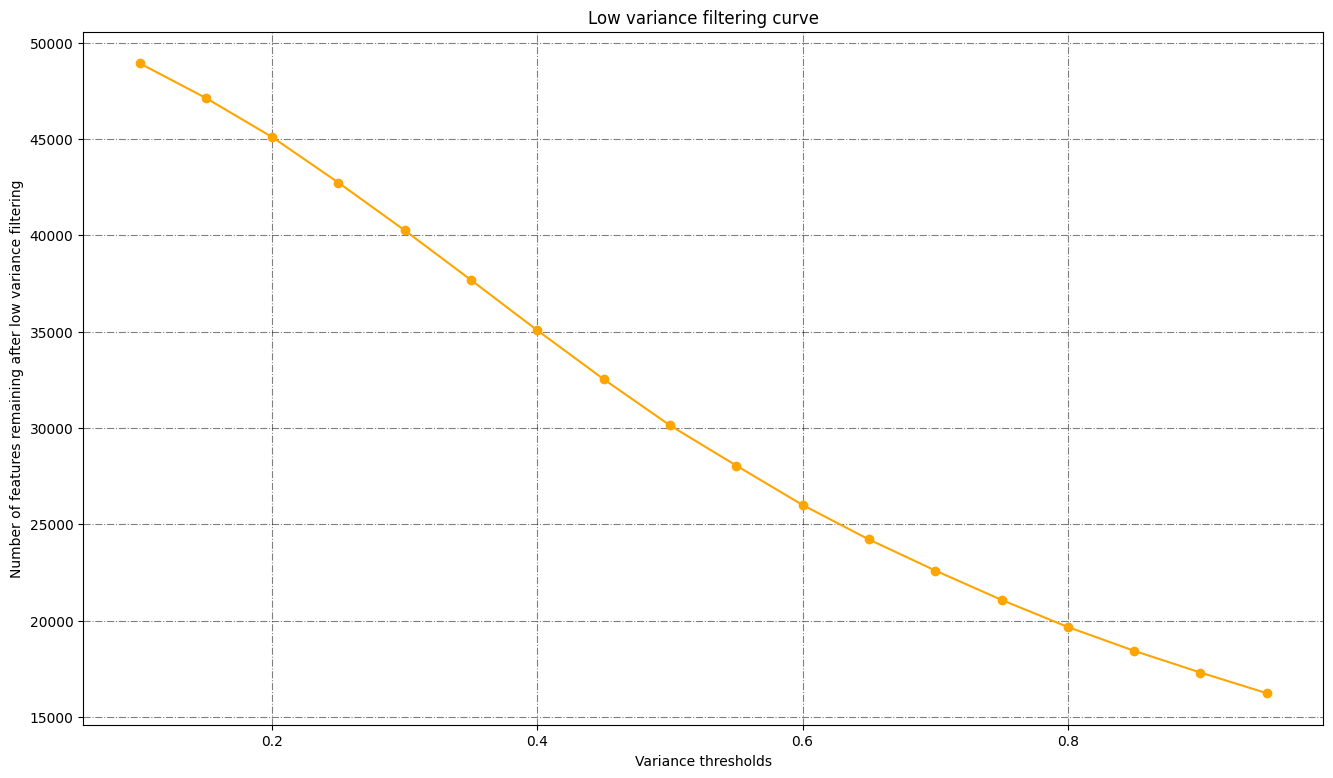

In [15]:
#低方差滤过策略
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
threshold_list,support=[],[]    #特征个数列表
for threshold in np.arange(0.1,0.99,0.05):
    Variance_Threshold=VarianceThreshold(threshold=threshold)
    Variance_Threshold.fit(Data_Class)
    threshold_list.append(threshold)
    support.append(len(Variance_Threshold.get_support(True)))
support_fig=plt.figure(figsize=(16,9))
support_plot=support_fig.add_subplot(111)
support_plot.set_title('Low variance filtering curve')
support_plot.grid(color='black',linestyle='-.',alpha=0.5)
support_plot.plot(threshold_list,support,linestyle='-',color='orange',marker='o')
support_plot.set_xlabel('Variance thresholds')
support_plot.set_ylabel('Number of features remaining after low variance filtering')
plt.show()

In [16]:
from pandas import DataFrame
#采用0.5的阈值进行低方差过滤
Variance_Threshold=VarianceThreshold(threshold=0.5)
Data_Class=Variance_Threshold.fit_transform(Data_Class)    #数据集转化
Data_Class=DataFrame(Data_Class)
Data_Class.columns=Variance_Threshold.get_feature_names_out()

In [17]:
#高相关过滤法，基于F分布
from sklearn.feature_selection import SelectKBest,f_classif
KBest=SelectKBest(score_func=f_classif,k=10000)    #获取高相关的前100000个特征
KBest.fit(Data_Class,disease)
from pandas import DataFrame
Score_DF=DataFrame()
Score_DF['feature']=DataFrame(Data_Class).columns    #特征命
Score_DF['Score']=KBest.scores_    #相关系数
Score_DF['P-value']=KBest.pvalues_    #P值
Score_DF=Score_DF.sort_values('Score',ascending=False)

In [18]:
#数据拼接
Data_Class=KBest.transform(Data_Class)
Data_Class=DataFrame(Data_Class)
Data_Class.columns=KBest.get_feature_names_out()

In [19]:
#数据样本正态性检验
from scipy.stats import normaltest
CgNormal_list=[]
for cg in Data_Class.columns:
    cg_data=Data_Class.loc[:,cg]    #获取cg数据
    NormalStats,p_value=normaltest(cg_data)     #正态检验
    if p_value>=0.05:
        print('甲基化位点:{0},正态检验结果:{1},P值:{2}'.format(cg,NormalStats,p_value))
        CgNormal_list.append(cg)

甲基化位点:cg00425885,正态检验结果:4.985875627771477,P值:0.0826667499616028
甲基化位点:cg04158367,正态检验结果:2.9654561771258137,P值:0.22701751893287192
甲基化位点:cg08928753,正态检验结果:1.275617118757193,P值:0.5284492211435821
甲基化位点:cg09154356,正态检验结果:4.815128587611353,P值:0.09003432488003488
甲基化位点:cg15198247,正态检验结果:2.8123940118438835,P值:0.2450735263469884
甲基化位点:cg18236877,正态检验结果:2.1216567622323197,P值:0.3461689317180136
甲基化位点:cg19827875,正态检验结果:0.641432390561573,P值:0.7256291587496142
甲基化位点:cg26907438,正态检验结果:1.0417861081558337,P值:0.5939898459784846
甲基化位点:cg01089914,正态检验结果:2.0895931642679137,P值:0.35176336705426064
甲基化位点:cg25168494,正态检验结果:3.8727230013639273,P值:0.14422776888080377
甲基化位点:cg27091865,正态检验结果:0.5015495971537929,P值:0.7781976030346871
甲基化位点:cg02519751,正态检验结果:0.7884110704597496,P值:0.6742154669674547
甲基化位点:cg07100595,正态检验结果:0.49643893390160276,P值:0.7801886988526888
甲基化位点:cg17482033,正态检验结果:3.1389137204432873,P值:0.20815821066356002
甲基化位点:cg10459087,正态检验结果:1.9132155073302384,P值:0.38419395849580174
甲基化位点:cg10957242,正态检验结

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


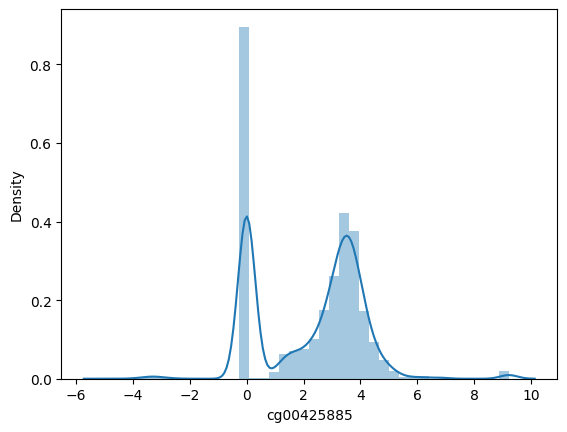

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


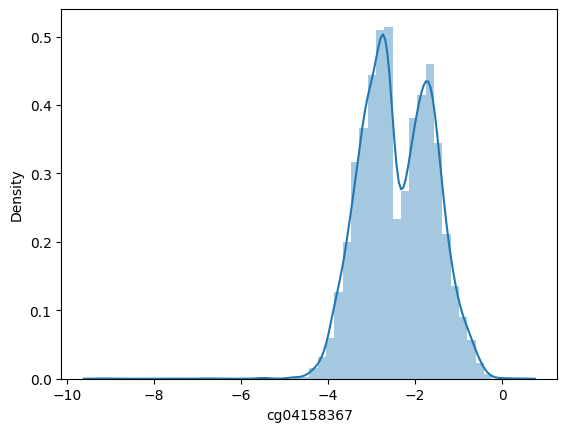

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


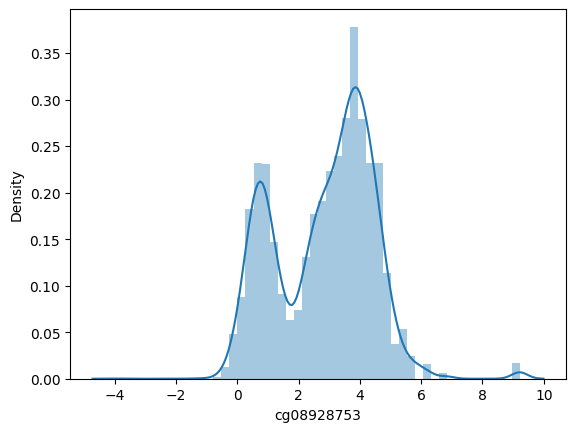

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


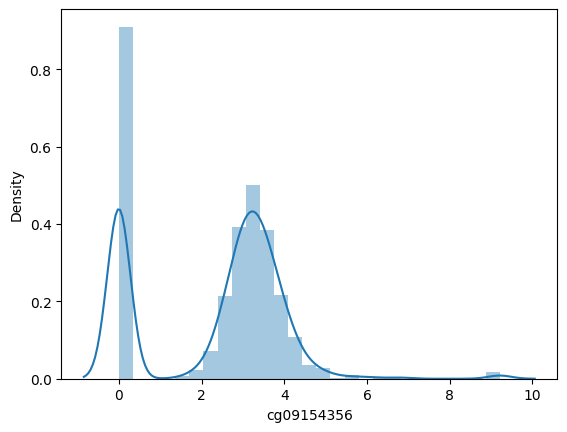

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


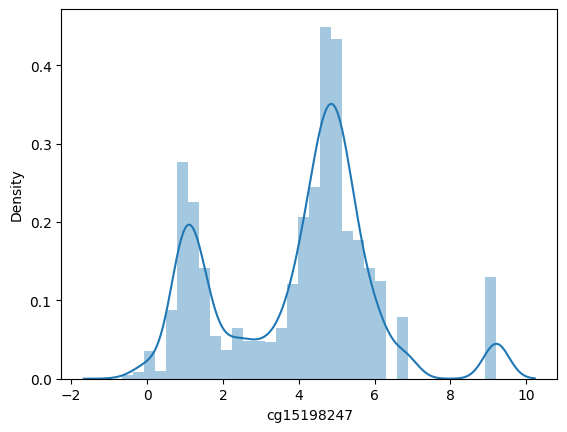

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


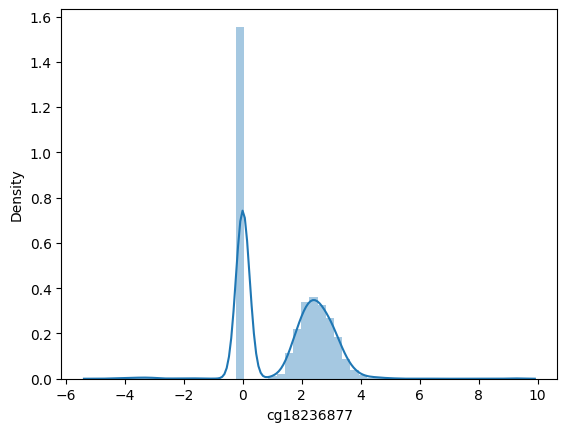

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


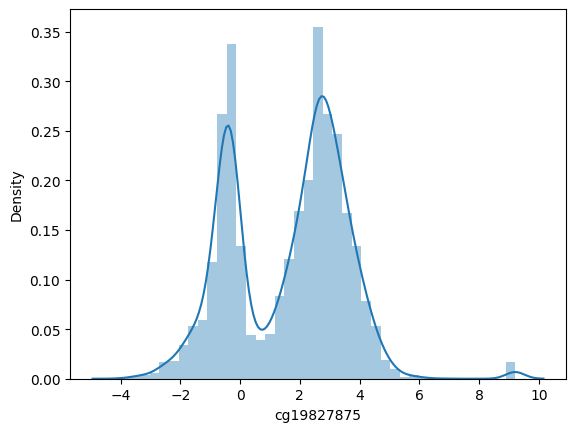

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


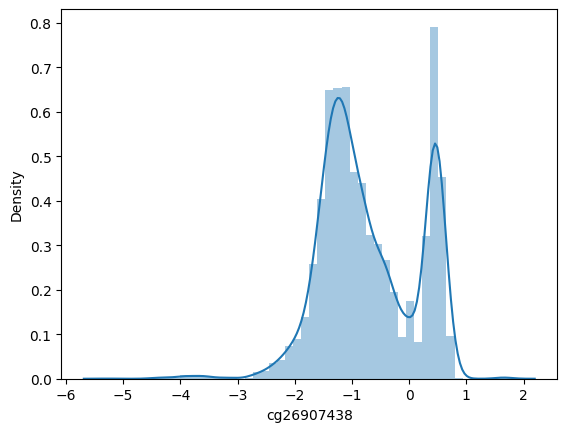

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


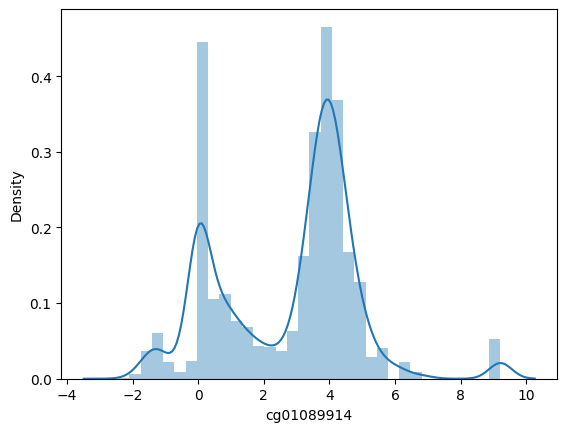

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


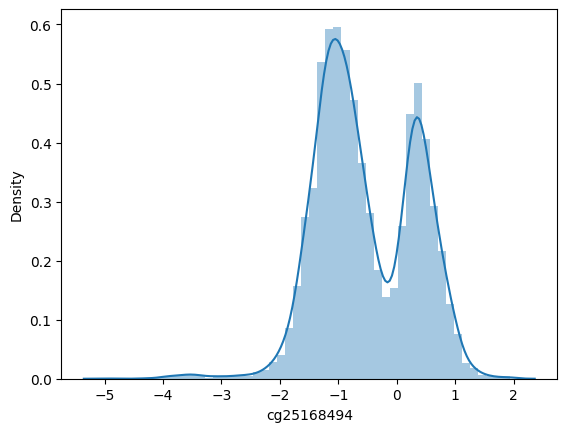

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


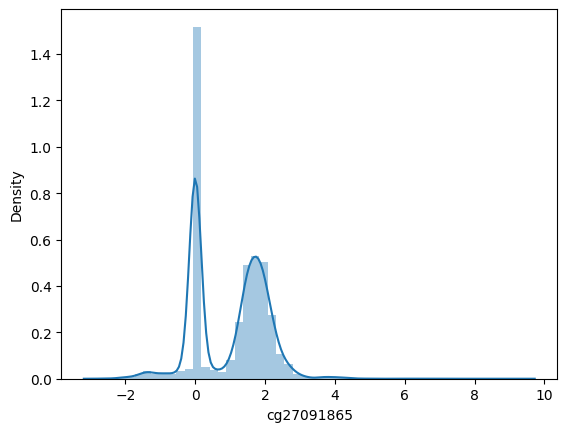

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


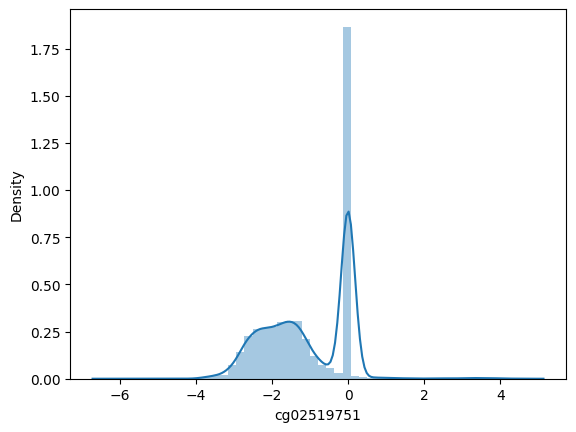

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


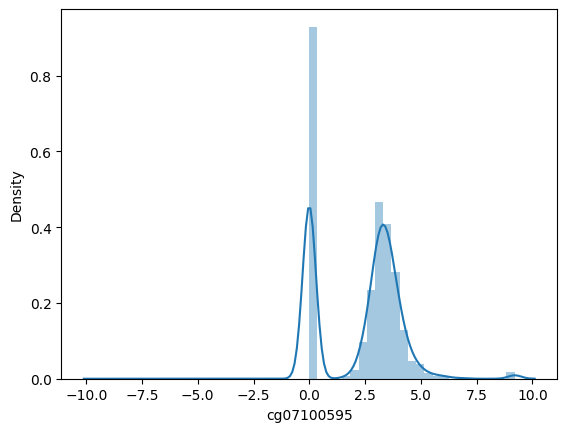

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


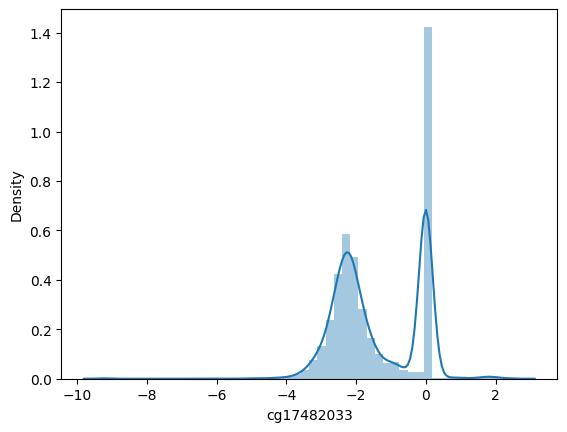

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


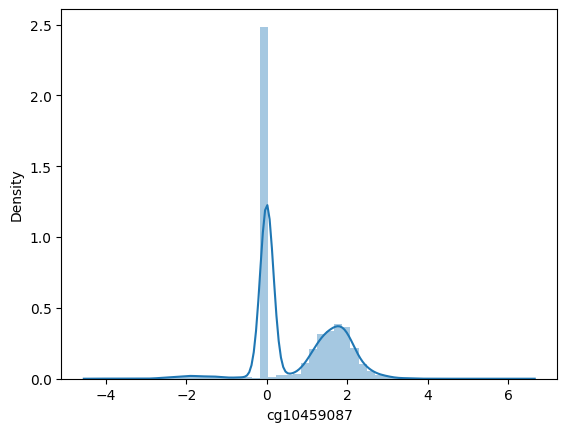

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


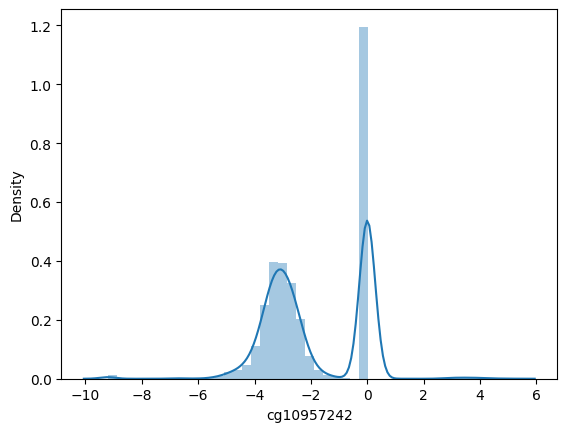

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


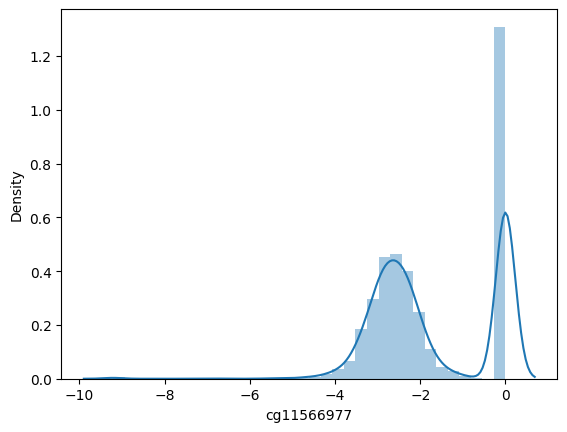

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


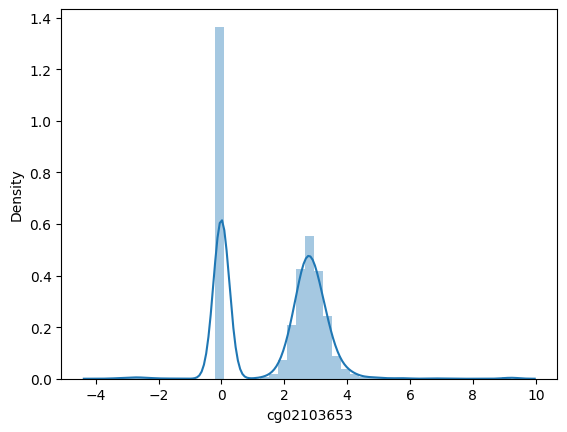

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


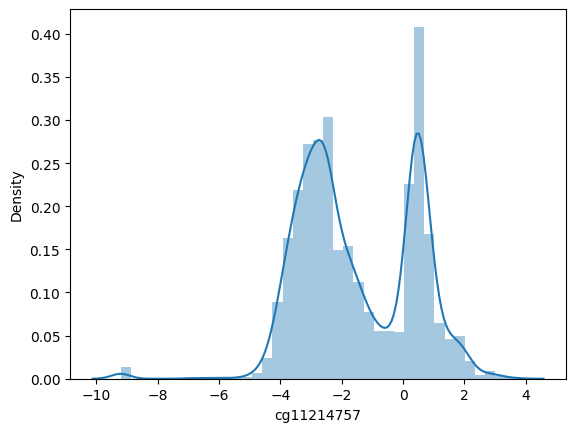

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


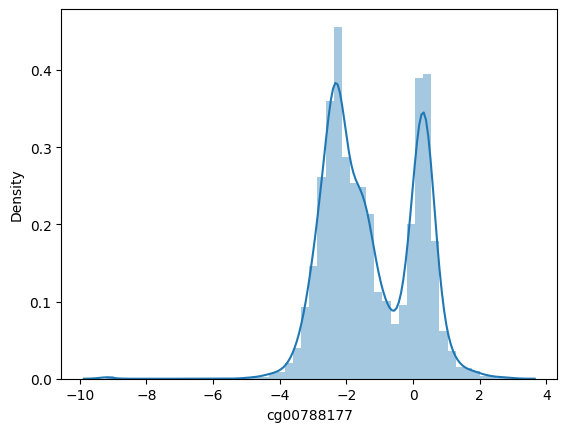

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


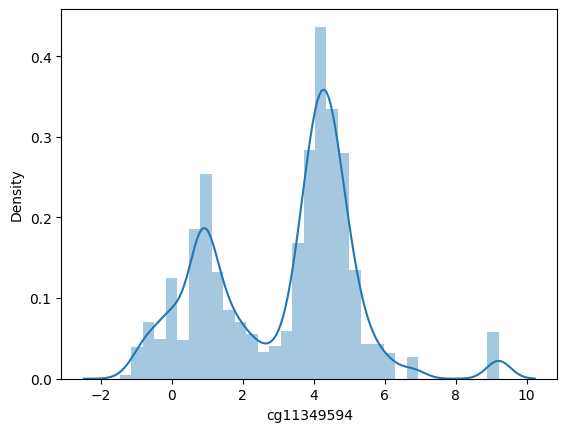

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


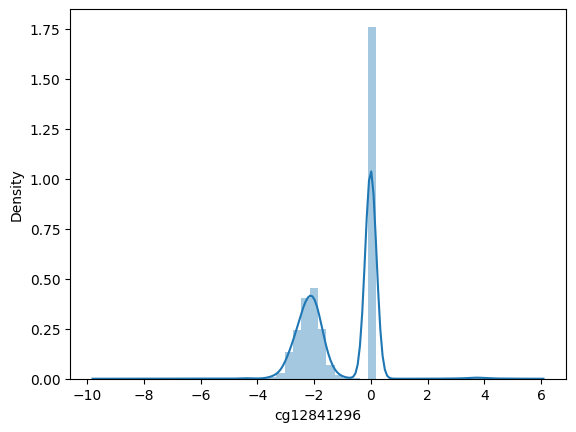

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


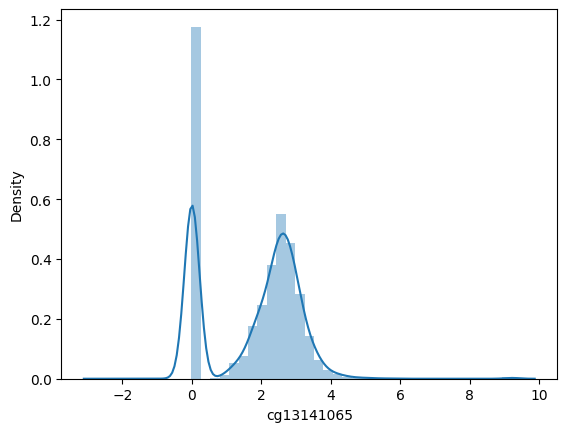

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


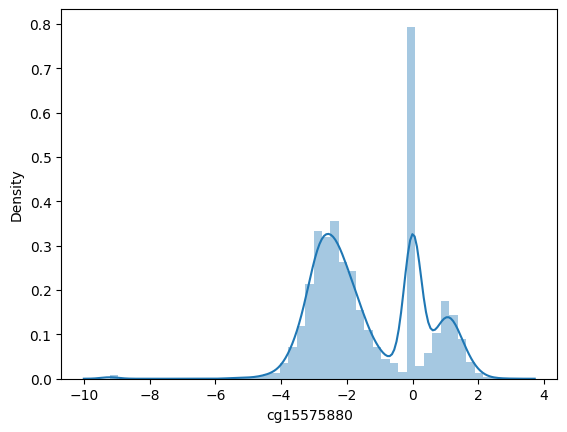

/tmp/ipykernel_18116/2423341379.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)


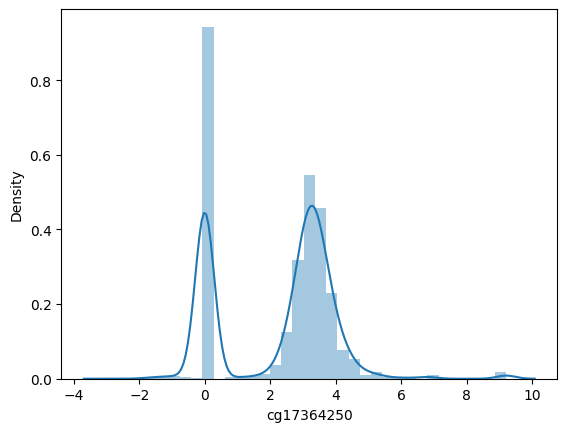

In [20]:
#查看服从正态分布的甲基化数据
import matplotlib.pyplot as plt
import seaborn as sns
for cg in CgNormal_list:
    hist_plt=plt.figure()
    sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)
    plt.show()

类别标签分布
disease_encode
0    6266
1     737
6     381
4     266
5     159
8     147
3     135
2      58
9      46
7      38
Name: count, dtype: int64


/tmp/ipykernel_18116/154768018.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disease,hist=True,kde=False)


<Axes: xlabel='disease_encode'>

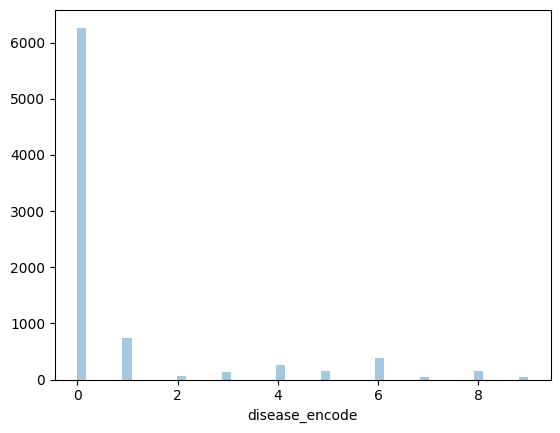

In [21]:
#查看标签数据分布
import seaborn as sns
print('类别标签分布')
print(disease.value_counts())
sns.distplot(disease,hist=True,kde=False)

In [22]:
traindata.loc[:,'gender_encode'].fillna(0,inplace=True)    #填充性别数据
traindata.loc[:,'gender_encode'].isnull().sum()

0

In [23]:
Data_Class['disease']=disease

In [24]:
#Data_Class.to_csv('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/Data/Data_Class.csv')

测试包含是否包含正常样本对模型的影响

包含正常样本

In [25]:
#分配训练和测试集
from sklearn.model_selection import train_test_split
Data_Class['Gender']=traindata.loc[:,'gender_encode']    #接入性别数据
Data_train_class,Data_test_class,Label_train_class,Label_test_class=train_test_split(Data_Class,disease,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Data_train_class.shape,Data_test_class.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Label_train_class.shape,Label_test_class.shape)) 

训练集数据规模为:(6586, 10002),测试集数据规模为:(1647, 10002)
训练集标签规模为:(6586,),测试集标签规模为:(1647,)


In [26]:
#查看数据标签分布
print('-------------训练数据集------------------')
print(Label_train_class.value_counts())
print('-------------测试数据集------------------')
print(Label_test_class.value_counts())

-------------训练数据集------------------
disease_encode
0    4992
1     607
6     302
4     220
5     130
8     120
3     107
2      40
9      36
7      32
Name: count, dtype: int64
-------------测试数据集------------------
disease_encode
0    1274
1     130
6      79
4      46
5      29
3      28
8      27
2      18
9      10
7       6
Name: count, dtype: int64


采用自适应过采样（ADASYN）和CondensedNearestNeighbour对数据类别进行处理

In [27]:
Columns=list(KBest.get_feature_names_out())+['age','gender','sample_type','disease','disease_encode',
                                             'sample_type_encode','gender_encode']
DataPreprocess=traindata.loc[:,Columns]    #数据合并
DataPreprocess

cg03706273  cg10363397  cg00014152  cg00016522  cg00072839  cg00374088   
0      -4.247583    0.000000    3.076403    0.116107   -4.322159    0.447220  \
1      -4.322159    0.000000    2.985388   -0.241113   -4.178048    0.306312   
2      -3.701353    0.000000    2.585369    0.322708   -2.174329    0.667610   
3      -3.472874    0.000000    2.804368    0.422073   -6.163916    0.363891   
4      -4.585271   -3.314031    1.945225   -1.628272   -4.940737    0.804620   
...          ...         ...         ...         ...         ...         ...   
8228   -4.489850    2.100192    9.210440   -4.489850   -2.963760   -2.785946   
8229   -3.406479    1.718460    5.093549   -4.247583   -2.749976   -2.732410   
8230   -2.732410    3.619579    3.701353   -3.993781   -2.585369   -2.616463   
8231   -3.439160    3.543689    3.938986   -3.374769   -2.401172   -1.564056   
8232   -3.149987    3.406479    4.322159   -4.940737   -2.804368   -2.207487   

      cg00688681  cg00723997  cg00938641  cg01013491  ...  cg19320816   
0       0.557927   -0.064009    1.288795    3.314031  ...   -3.149987  \
1      -0.011998   -0.277716    1.324576    2.942546  ...   -3.406479   
2       0.261427   -0.204671    1.247949    3.201956  ...   -3.837361   
3       0.443019   -0.532105    1.392179    3.472874  ...   -3.790034   
4       0.298130   -1.109037    1.230724    3.406479  ...   -3.701353   
...          ...         ...         ...         ...  ...         ...   
8228   -1.606561   -3.100385    2.300497    2.414368  ...   -4.402578   
8229   -2.039899   -2.511081    2.288480    2.732410  ...   -4.322159   
8230   -1.318561   -3.052934    2.585369    2.570129  ...   -5.773449   
8231   -1.726235   -3.076403    2.059685    2.804368  ...   -4.322159   
8232   -2.030118   -3.228904    2.441207    2.264792  ...   -4.940737   

      cg19349369  cg19350197   age  gender     sample_type   
0      -1.185564    2.253116  88.0       F  disease tissue  \
1      -1.765757    2.511081  92.0       F  disease tissue   
2      -1.213659    1.765757  93.0       F  disease tissue   
3      -1.856830    2.207487  96.0       F  disease tissue   
4      -1.749816    2.264792  91.0       M  disease tissue   
...          ...         ...   ...     ...             ...   
8228   -4.402578    0.929415  74.0       M  disease tissue   
8229   -3.507691    0.708031  74.0       M  disease tissue   
8230   -3.993781    0.627708  81.0       M  disease tissue   
8231   -4.247583    0.818704  67.0       M  disease tissue   
8232   -4.178048    0.880658  68.0       M  disease tissue   

                  disease  disease_encode  sample_type_encode  gender_encode  
0     Alzheimer's disease               1                   1            0.0  
1     Alzheimer's disease               1                   1            0.0  
2     Alzheimer's disease               1                   1            0.0  
3     Alzheimer's disease               1                   1            0.0  
4     Alzheimer's disease               1                   1            1.0  
...                   ...             ...                 ...            ...  
8228      type 2 diabetes               9                   1            1.0  
8229      type 2 diabetes               9                   1            1.0  
8230      type 2 diabetes               9                   1            1.0  
8231      type 2 diabetes               9                   1            1.0  
8232      type 2 diabetes               9                   1            1.0  

[8233 rows x 10007 columns]

In [28]:
DataPreprocess['gender_encode'].fillna(0,inplace=True)    #填充空缺数据
DataPreprocess['gender_encode'].isnull().sum()

0

In [29]:
DataPreprocess.to_csv('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/Data/DataPreprocess.csv')

In [30]:
#再次读取数据
#import pandas as pd
#DataPreprocess=pd.read_csv('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/Data/DataPreprocess.csv')
#DataPreprocess.head(10)

In [31]:
#提取疾病数据
Preprocess=DataPreprocess.loc[DataPreprocess['sample_type_encode']==1,:]    #提取患病个体数据
DiseaseData=Preprocess.iloc[:,1:-7]    #提取甲基化数据
DiseaseData['gender_encode']=DataPreprocess['gender_encode']    #添加性别数据
DiseaseType=Preprocess.loc[:,'disease_encode']-1    #提取疾病数据

数据标签分布: Counter({0: 737, 5: 381, 3: 266, 4: 159, 7: 147, 2: 135, 1: 58, 8: 46, 6: 38})


/tmp/ipykernel_18116/313587201.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DiseaseType,hist=True,kde=False,rug=False)    #绘制直方图


<Axes: xlabel='disease_encode'>

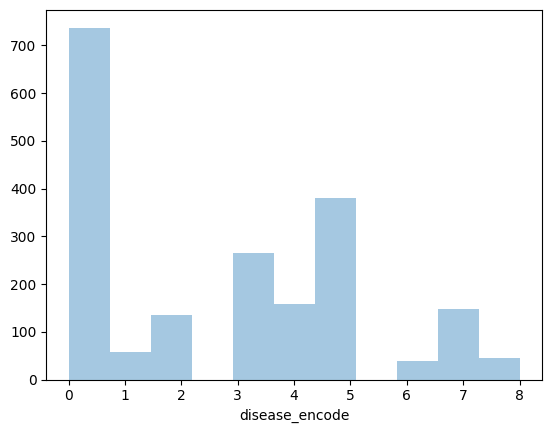

In [32]:
#查看数据分布
import seaborn as sns
from collections import Counter
print('数据标签分布:',Counter(DiseaseType))
sns.distplot(DiseaseType,hist=True,kde=False,rug=False)    #绘制直方图

/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass

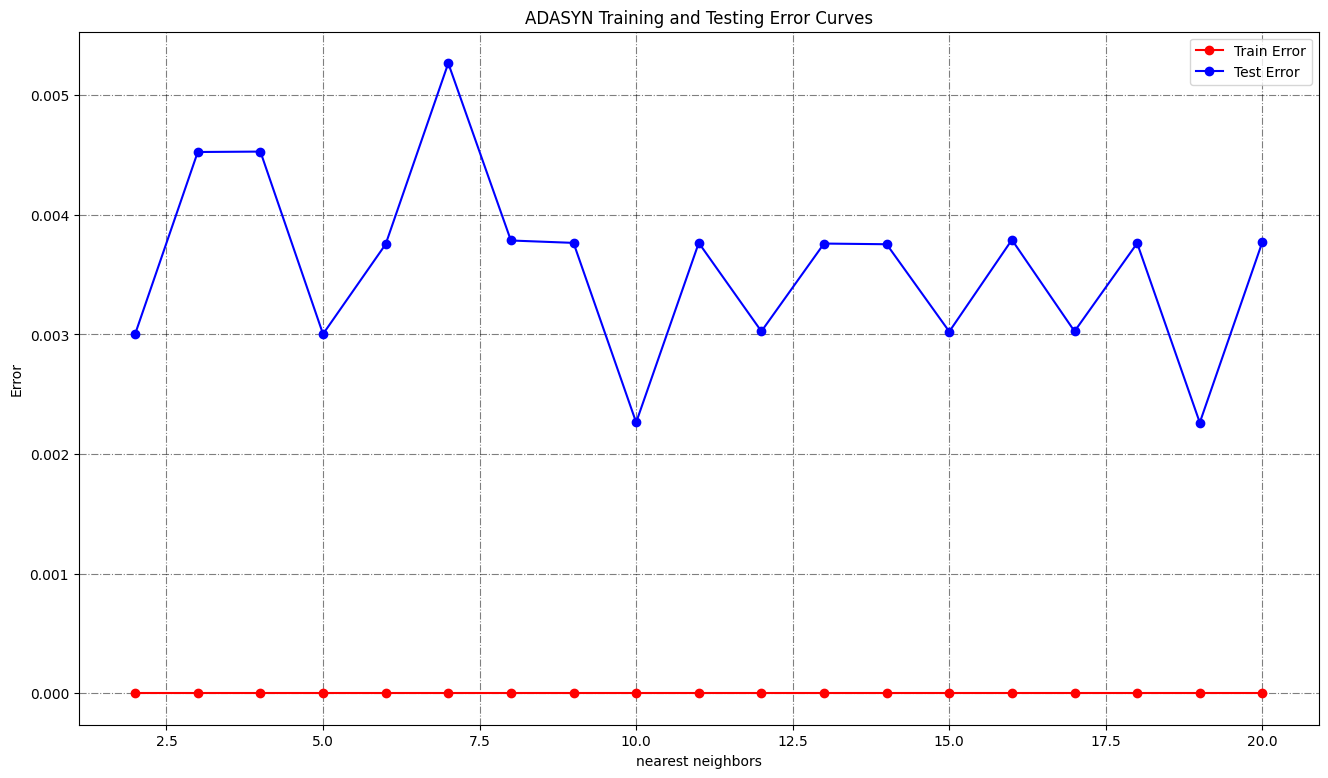

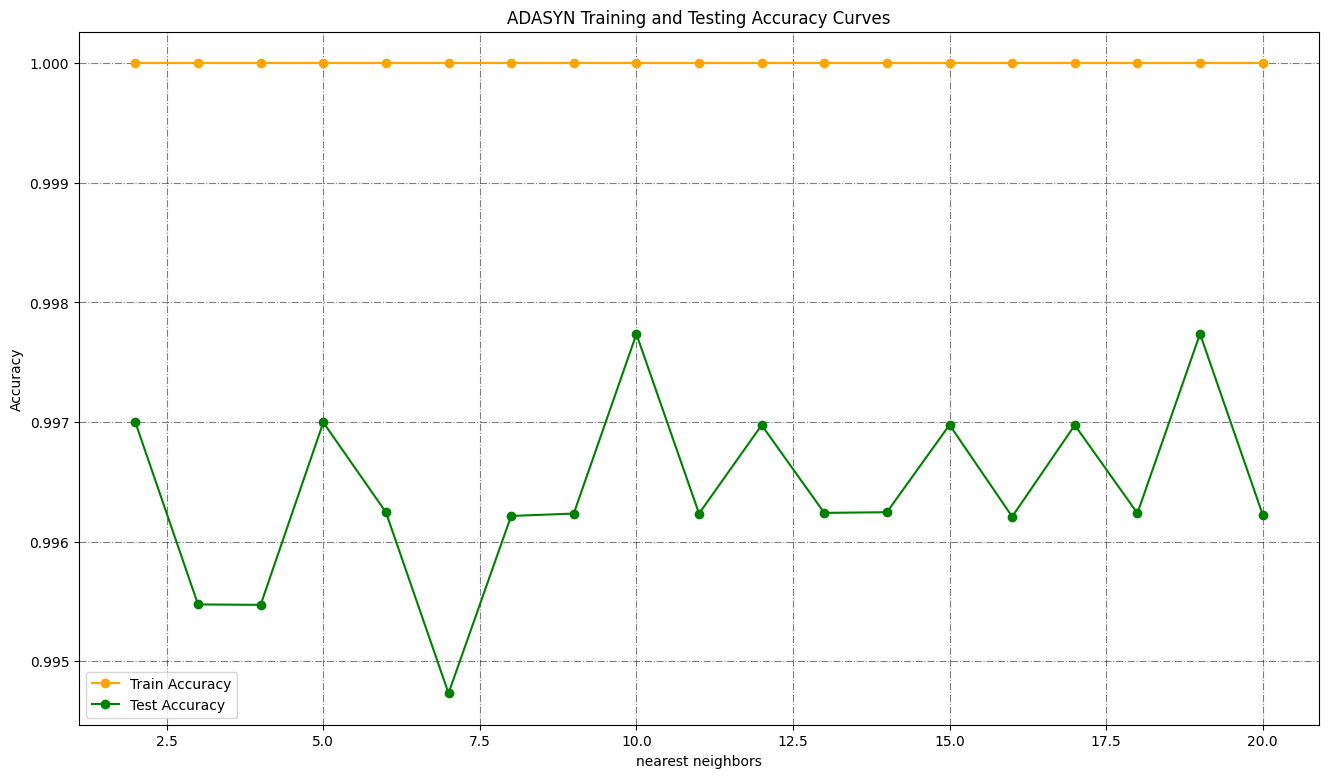

In [33]:
#测试自适应过采样算法K-近邻数
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
N,Train_Error,Test_Error,Train_Accuracy,Test_Accuracy=[],[],[],[],[]
for n in np.arange(2,21,1):
    adasyn=ADASYN(sampling_strategy='auto',random_state=2024,n_neighbors=n,n_jobs=-1)
    Data_resample,Disease_resample=adasyn.fit_resample(DiseaseData,DiseaseType)    #数据集过采样
    X_train_resample,X_test_resample,y_train_resample,y_test_resample=train_test_split(Data_resample,Disease_resample,
                                                                                      train_size=0.8,random_state=2024)    #数据集划分
    Model_XGB=XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
    Model_XGB.fit(X_train_resample,y_train_resample)    #模型训练
    N.append(n)    #添加近邻特征
    Train_Error.append(1-Model_XGB.score(X_train_resample,y_train_resample))    #添加训练误差
    Test_Error.append(1-Model_XGB.score(X_test_resample,y_test_resample))    #添加测试误差
    Train_Accuracy.append(accuracy_score(y_train_resample,Model_XGB.predict(X_train_resample)))    #添加训练精度
    Test_Accuracy.append(accuracy_score(y_test_resample,Model_XGB.predict(X_test_resample)))    #添加测试精度
Error_fig=plt.figure(figsize=(16,9))
Error_plot=Error_fig.add_subplot(111)
Error_plot.set_title('ADASYN Training and Testing Error Curves')
Error_plot.grid(color='black',linestyle='-.',alpha=0.5)
Error_plot.plot(N,Train_Error,linestyle='-',color='red',marker='o',label='Train Error')    #绘制训练误差曲线
Error_plot.plot(N,Test_Error,linestyle='-',color='blue',marker='o',label='Test Error')    #绘制测试误差曲线
Error_plot.set_xlabel('nearest neighbors')
Error_plot.set_ylabel('Error')
plt.legend()
plt.show()
Accuracy_fig=plt.figure(figsize=(16,9))
Accuracy_plot=Accuracy_fig.add_subplot(111)
Accuracy_plot.set_title('ADASYN Training and Testing Accuracy Curves')
Accuracy_plot.grid(color='black',linestyle='-.',alpha=0.5)
Accuracy_plot.plot(N,Train_Accuracy,linestyle='-',color='orange',marker='o',label='Train Accuracy')    #绘制训练误差曲线
Accuracy_plot.plot(N,Test_Accuracy,linestyle='-',color='green',marker='o',label='Test Accuracy')    #绘制测试误差曲线
Accuracy_plot.set_xlabel('nearest neighbors')
Accuracy_plot.set_ylabel('Accuracy')
plt.legend()
plt.show()

/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


数据过采样后分布: Counter({8: 741, 1: 739, 4: 738, 0: 737, 7: 736, 5: 735, 2: 733, 3: 732, 6: 732})


/tmp/ipykernel_18116/1772189157.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DiseaseType_resample,hist=True,kde=False,rug=False)


<Axes: xlabel='disease_encode'>

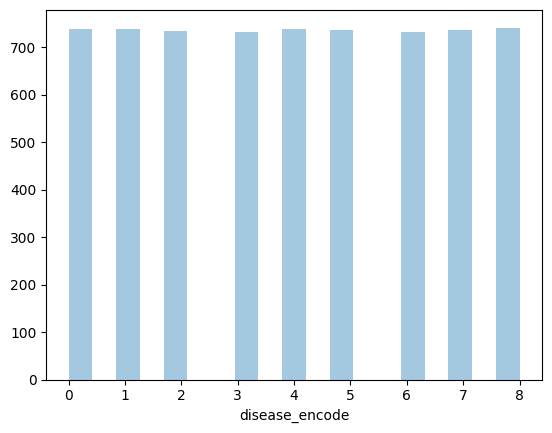

In [34]:
#选择10作为数据自适应过采样算法参数
Adasyn=ADASYN(sampling_strategy='auto',random_state=2024,n_neighbors=10,n_jobs=-1)
DiseaseData_resample,DiseaseType_resample=Adasyn.fit_resample(DiseaseData,DiseaseType)    #数据集过采样
print('数据过采样后分布:',Counter(DiseaseType_resample))
sns.distplot(DiseaseType_resample,hist=True,kde=False,rug=False)

In [35]:
#数据合并
Preprocess_control=DataPreprocess.loc[DataPreprocess['sample_type_encode']==0,:]    #提取正常个体数据
DiseaseData_control=Preprocess_control.iloc[:,1:-7]    #提取甲基化数据
DiseaseData_control['gender_encode']=Preprocess_control['gender_encode']    #添加性别数据
DiseaseType_control=Preprocess_control.loc[:,'disease_encode']    #提取正常数据
DiseaseData=pd.concat([DiseaseData_resample,DiseaseData_control],ignore_index=True)    #合并甲基化数据
DiseaseType_resample=DiseaseType_resample+1    #修复数据类别
DiseaseType=pd.concat([DiseaseType_resample,DiseaseType_control],ignore_index=True)    #合并疾病类别数据

合并后数据分布: Counter({0: 6266, 9: 741, 2: 739, 5: 738, 1: 737, 8: 736, 6: 735, 3: 733, 4: 732, 7: 732})


/tmp/ipykernel_18116/2629016459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DiseaseType,hist=True,kde=False,rug=False)


<Axes: xlabel='disease_encode'>

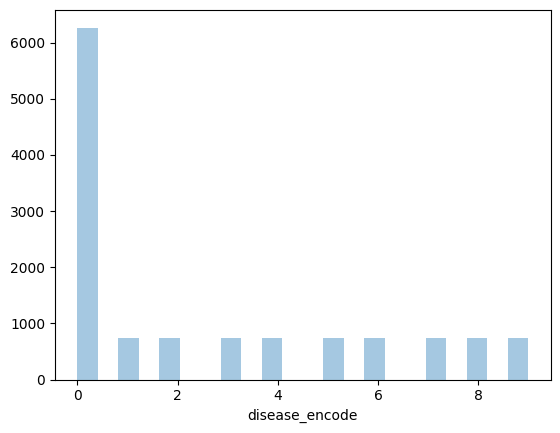

In [36]:
#查看合并后数据分布
print('合并后数据分布:',Counter(DiseaseType))
sns.distplot(DiseaseType,hist=True,kde=False,rug=False)

In [ ]:
#测试CondensedNearestNeighbour算法K-近邻数
from imblearn.under_sampling import CondensedNearestNeighbour
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N_CNN,Train_Error_CNN,Test_Error_CNN,Train_Accuracy_CNN,Test_Accuracy_CNN=[],[],[],[],[]
for n in tqdm(np.arange(2,21,1)):
    CNN=CondensedNearestNeighbour(sampling_strategy='auto',random_state=2024,n_neighbors=n,n_jobs=-1)
    Data_cnn,Disease_cnn=CNN.fit_resample(DiseaseData,DiseaseType)    #数据集过采样
    X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn=train_test_split(Data_cnn,Disease_cnn,train_size=0.8,random_state=2024)    #数据集划分
    Model_XGB_CNN=XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
    Model_XGB_CNN.fit(X_train_cnn,y_train_cnn)    #模型训练
    N_CNN.append(n)    #添加近邻特征
    Train_Error_CNN.append(1-Model_XGB_CNN.score(X_train_cnn,y_train_cnn))    #添加训练误差
    Test_Error_CNN.append(1-Model_XGB_CNN.score(X_test_cnn,y_test_cnn))    #添加测试误差
    Train_Accuracy_CNN.append(accuracy_score(y_train_cnn,Model_XGB.predict(X_train_cnn)))    #添加训练精度
    Test_Accuracy_CNN.append(accuracy_score(y_test_cnn,Model_XGB.predict(X_test_cnn)))    #添加测试精度
Error_fig_cnn=plt.figure(figsize=(16,9))
Error_plot_cnn=Error_fig_cnn.add_subplot(111)
Error_plot_cnn.set_title('CondensedNearestNeighbour Training and Testing Error Curves')
Error_plot_cnn.grid(color='black',linestyle='-.',alpha=0.5)
Error_plot_cnn.plot(N_CNN,Train_Error_CNN,linestyle='-',color='red',marker='o',label='Train Error')    #绘制训练误差曲线
Error_plot_cnn.plot(N_CNN,Test_Error_CNN,linestyle='-',color='blue',marker='o',label='Test Error')    #绘制测试误差曲线
Error_plot_cnn.set_xlabel('nearest neighbors')
Error_plot_cnn.set_ylabel('Error')
plt.legend()
plt.show()
Accuracy_fig_cnn=plt.figure(figsize=(16,9))
Accuracy_plot_cnn=Accuracy_fig_cnn.add_subplot(111)
Accuracy_plot_cnn.set_title('CondensedNearestNeighbour Training and Testing Accuracy Curves')
Accuracy_plot_cnn.grid(color='black',linestyle='-.',alpha=0.5)
Accuracy_plot_cnn.plot(N_CNN,Train_Accuracy_CNN,linestyle='-',color='orange',marker='o',label='Train Accuracy')    #绘制训练误差曲线
Accuracy_plot_cnn.plot(N_CNN,Test_Accuracy_CNN,linestyle='-',color='green',marker='o',label='Test Accuracy')    #绘制测试误差曲线
Accuracy_plot_cnn.set_xlabel('nearest neighbors')
Accuracy_plot_cnn.set_ylabel('Accuracy')
plt.legend()
plt.show()

CNN欠采样后数据分布: Counter({0: 1197, 4: 732, 6: 173, 1: 151, 8: 47, 7: 39, 9: 35, 2: 32, 5: 32, 3: 20})


/tmp/ipykernel_18116/480447034.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DiseaseType_CNN,hist=True,kde=False,rug=False)    #绘制直方图查看数据类别分布


<Axes: xlabel='disease_encode'>

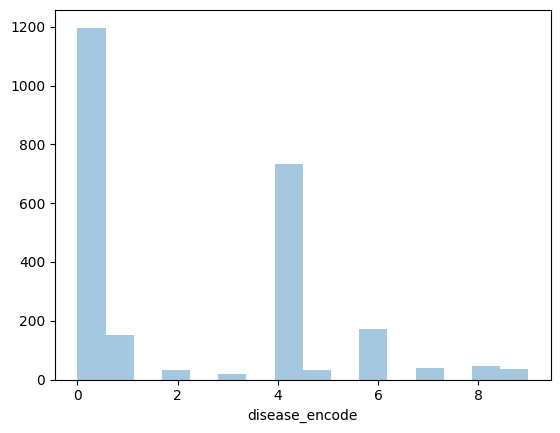

In [38]:
#数据集转化
from imblearn.under_sampling import CondensedNearestNeighbour
CNN=CondensedNearestNeighbour(sampling_strategy='auto',random_state=2024,n_neighbors=10,n_jobs=-1)
DiseaseData_CNN,DiseaseType_CNN=CNN.fit_resample(DiseaseData,DiseaseType)    #数据重构
print('CNN欠采样后数据分布:',Counter(DiseaseType_CNN))
sns.distplot(DiseaseType_CNN,hist=True,kde=False,rug=False)    #绘制直方图查看数据类别分布

模型训练

In [39]:
#数据集划分
from sklearn.model_selection import train_test_split
Data_train_class,Data_test_class,Label_train_class,Label_test_class=train_test_split(DiseaseData_CNN,DiseaseType_CNN,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Data_train_class.shape,Data_test_class.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Label_train_class.shape,Label_test_class.shape)) 

训练集数据规模为:(1966, 10000),测试集数据规模为:(492, 10000)
训练集标签规模为:(1966,),测试集标签规模为:(492,)


In [40]:
#查看数据标签分布
print('-------------训练数据集------------------')
print(Label_train_class.value_counts())
print('-------------测试数据集------------------')
print(Label_test_class.value_counts())

-------------训练数据集------------------
disease_encode
0    965
4    575
6    140
1    118
8     40
7     36
9     28
5     24
2     23
3     17
Name: count, dtype: int64
-------------测试数据集------------------
disease_encode
0    232
4    157
6     33
1     33
2      9
5      8
9      7
8      7
3      3
7      3
Name: count, dtype: int64


In [41]:
#加载并训练XGBoost模型
import xgboost
Model_XGB_Class=xgboost.XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Model_XGB_Class.fit(Data_train_class,Label_train_class) 

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [42]:
#模型测量
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
def Model_Evaluate(model,X_train,y_train,X_test,y_test):
    train_pred=model.predict(X_train)    #训练误差测定
    Label_name=['control','Alzheimer disease','Graves disease','Huntington disease','Parkinsons disease','rheumatoid arthritis',
             'schizophrenia','Sjogren syndrome','stroke','type 2 diabetes']
    precision_train=precision_score(y_train,train_pred,average='micro')
    recall_train=recall_score(y_train,train_pred,average='micro')
    f1_train=f1_score(y_train,train_pred,average='micro')
    accuracy_train=accuracy_score(y_train,train_pred)
    print('模型训练准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_train,recall_train,f1_train,accuracy_train))
    test_pred=model.predict(X_test)    #测试误差测定
    precision_test=precision_score(y_test,test_pred,average='micro')
    recall_test=recall_score(y_test,test_pred,average='micro')
    f1_test=f1_score(y_test,test_pred,average='micro')
    accuracy_test=accuracy_score(y_test,test_pred)
    print('模型测试准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_test,recall_test,f1_test,accuracy_test))
    train_err=1-model.score(X_train,y_train)
    test_err=1-model.score(X_test,y_test)
    print('模型训练误差:{0},测试误差:{1}'.format(train_err,test_err))
    print('----------------------训练数据集分类评估结果----------------------')
    print(classification_report(y_train,train_pred,target_names=Label_name))
    print('----------------------测试数据集分类评估结果----------------------')
    print(classification_report(y_test,test_pred,target_names=Label_name))
Model_Evaluate(Model_XGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:0.9933875890132248,召回率为:0.9933875890132248,f1分数为:0.9933875890132248,精度为:0.9933875890132248
模型测试准确率为:0.8252032520325203,召回率为:0.8252032520325203,f1分数为:0.8252032520325203,精度为:0.8252032520325203
模型训练误差:0.00661241098677523,测试误差:0.17479674796747968
----------------------训练数据集分类评估结果----------------------
                      precision    recall  f1-score   support

             control       0.99      0.99      0.99       965
   Alzheimer disease       0.99      0.98      0.99       118
      Graves disease       1.00      1.00      1.00        23
  Huntington disease       1.00      1.00      1.00        17
  Parkinsons disease       0.99      0.99      0.99       575
rheumatoid arthritis       1.00      1.00      1.00        24
       schizophrenia       1.00      1.00      1.00       140
    Sjogren syndrome       1.00      1.00      1.00        36
              stroke       1.00      1.00      1.00        40
     type 2 diabetes       1.00      1.00      1.00        28

        

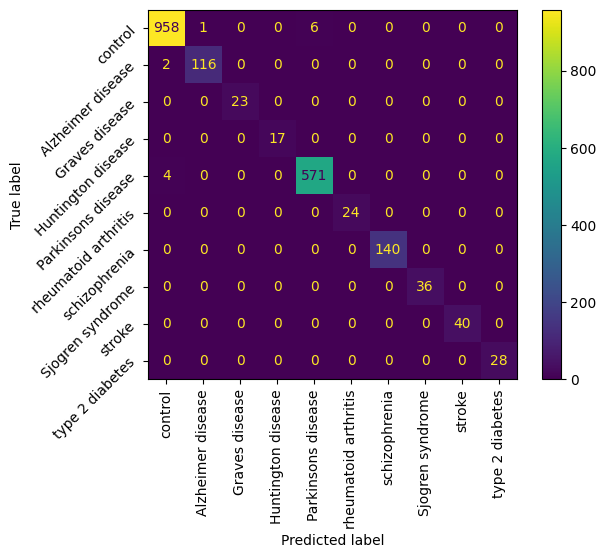

In [43]:
#可视化混淆矩阵
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def Viz_confusion_Matrix(model,X,y):
    Label_class=['control','Alzheimer disease','Graves disease','Huntington disease','Parkinsons disease','rheumatoid arthritis',
             'schizophrenia','Sjogren syndrome','stroke','type 2 diabetes']
    y_pred=model.predict(X)
    con_matr=confusion_matrix(y, y_pred)
    con_matr=ConfusionMatrixDisplay(con_matr,display_labels=Label_class)
    con_matr.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='d', ax=None)
    con_matr.ax_.set_xticklabels(Label_class, rotation=90)  # 这里可以设置x轴标签的旋转角度 
    con_matr.ax_.set_yticklabels(Label_class, rotation=45)  # 这里可以设置y轴标签的旋转角度
Viz_confusion_Matrix(Model_XGB_Class, Data_train_class,Label_train_class)    #可视化Xgboost模型混淆矩阵(训练)

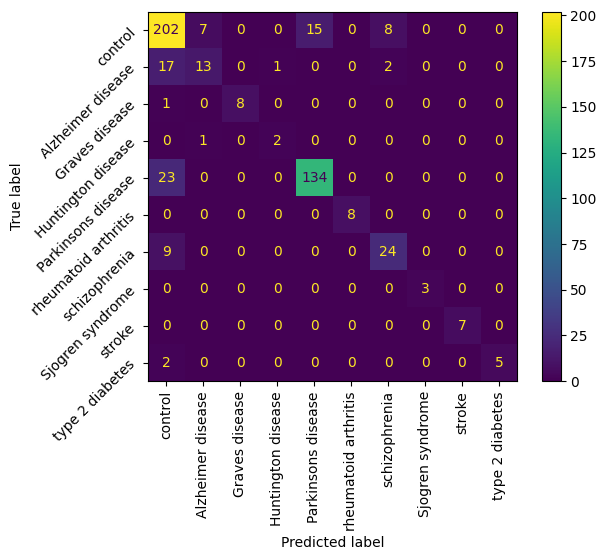

In [44]:
Viz_confusion_Matrix(Model_XGB_Class, Data_test_class,Label_test_class)    #可视化Xgboost模型混淆矩阵(测试)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

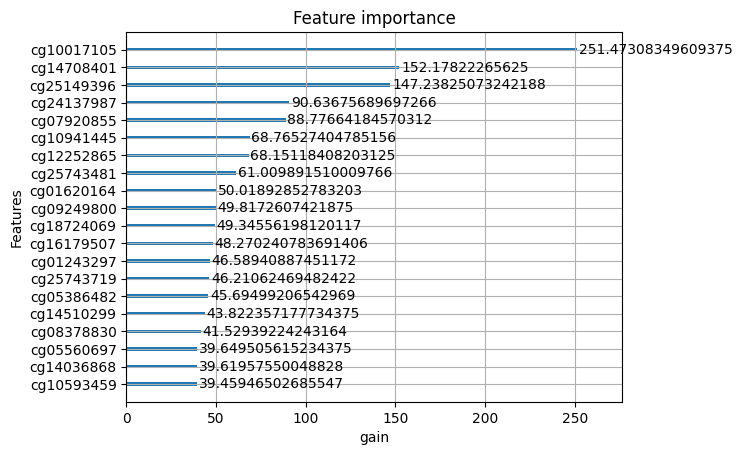

In [45]:
#提取贡献较大的前20个甲基化位点
from xgboost import plot_importance
plot_importance(Model_XGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点数据

In [46]:
#保存模型
import joblib
joblib.dump(Model_XGB_Class,'/mnt/workspace/Disease_class/ClassModels/Model_XGB_Class.pkl')

['/mnt/workspace/Disease_class/ClassModels/Model_XGB_Class.pkl']

In [47]:
Model_XGB_Class.save_model('/mnt/workspace/Disease_class/ClassModels/model_file_xgb_class.xgb')

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
Model_LGB_Class=LGBMClassifier(subsample=0.5,colsample_bytree=0.5,n_jobs=-1)
Model_LGB_Class.fit(Data_train_class,Label_train_class)

In [50]:
Model_Evaluate(Model_LGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:0.9933875890132248,召回率为:0.9933875890132248,f1分数为:0.9933875890132248,精度为:0.9933875890132248
模型测试准确率为:0.8089430894308943,召回率为:0.8089430894308943,f1分数为:0.8089430894308943,精度为:0.8089430894308943
模型训练误差:0.00661241098677523,测试误差:0.19105691056910568
----------------------训练数据集分类评估结果----------------------
                      precision    recall  f1-score   support

             control       1.00      0.99      0.99       965
   Alzheimer disease       0.98      0.99      0.99       118
      Graves disease       1.00      1.00      1.00        23
  Huntington disease       1.00      1.00      1.00        17
  Parkinsons disease       0.98      1.00      0.99       575
rheumatoid arthritis       1.00      1.00      1.00        24
       schizophrenia       1.00      1.00      1.00       140
    Sjogren syndrome       1.00      1.00      1.00        36
              stroke       1.00      1.00      1.00        40
     type 2 diabetes       1.00      1.00      1.00        28

        

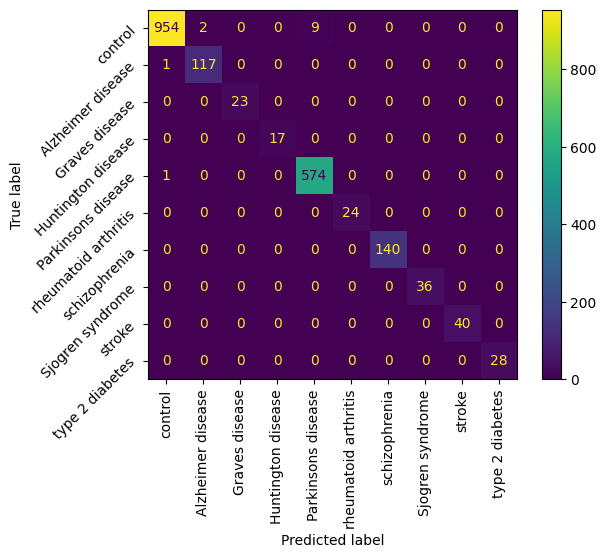

In [51]:
Viz_confusion_Matrix(Model_LGB_Class, Data_train_class,Label_train_class)    #可视化lightGM模型混淆矩阵(训练)

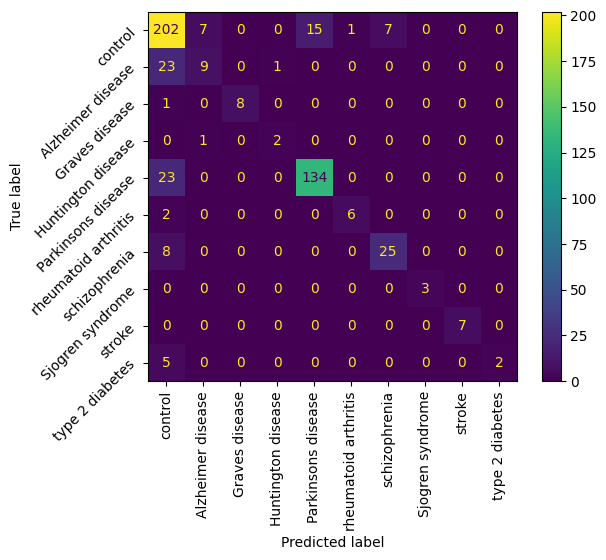

In [64]:
Viz_confusion_Matrix(Model_LGB_Class, Data_test_class,Label_test_class)    #可视化lightGM模型混淆矩阵(测试)

In [60]:
joblib.dump(Model_LGB_Class,'/mnt/workspace/Disease_class/ClassModels/Model_LGB_Class.pkl')

['/mnt/workspace/Disease_class/ClassModels/Model_LGB_Class.pkl']

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

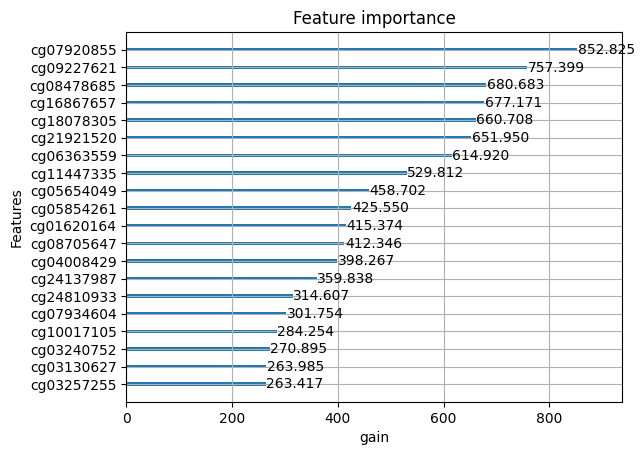

In [54]:
from lightgbm import plot_importance
plot_importance(Model_LGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点

In [ ]:
pip install catboost

In [ ]:
#训练catBoost模型
from catboost import CatBoostClassifier
Model_Cat=CatBoostClassifier(learning_rate=0.5, depth=3, bootstrap_type='Bernoulli',
                            random_seed=2023,od_type='Iter', od_wait=100)
Model_Cat.fit(Data_train_class,Label_train_class)

In [56]:
Model_Evaluate(Model_Cat, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:0.9933875890132248,召回率为:0.9933875890132248,f1分数为:0.9933875890132248,精度为:0.9933875890132248
模型测试准确率为:0.7967479674796748,召回率为:0.7967479674796748,f1分数为:0.7967479674796748,精度为:0.7967479674796748
模型训练误差:0.00661241098677523,测试误差:0.2032520325203252
----------------------训练数据集分类评估结果----------------------
                      precision    recall  f1-score   support

             control       0.99      0.99      0.99       965
   Alzheimer disease       1.00      0.97      0.99       118
      Graves disease       1.00      1.00      1.00        23
  Huntington disease       1.00      1.00      1.00        17
  Parkinsons disease       0.99      0.99      0.99       575
rheumatoid arthritis       1.00      1.00      1.00        24
       schizophrenia       1.00      1.00      1.00       140
    Sjogren syndrome       1.00      1.00      1.00        36
              stroke       1.00      1.00      1.00        40
     type 2 diabetes       1.00      1.00      1.00        28

         

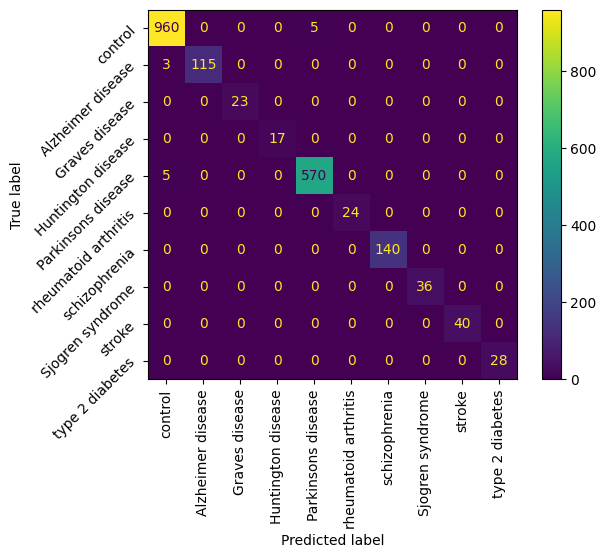

In [57]:
Viz_confusion_Matrix(Model_Cat, Data_train_class,Label_train_class)    #可视化CatBoost模型混淆矩阵(训练)

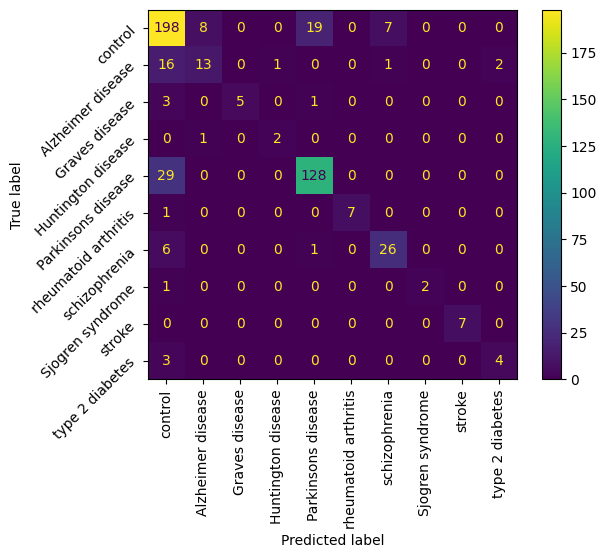

In [58]:
Viz_confusion_Matrix(Model_Cat, Data_test_class,Label_test_class)    #可视化CatBoost模型混淆矩阵(测试)

In [61]:
joblib.dump(Model_Cat,'/mnt/workspace/Disease_class/ClassModels/Model_Cat_Class.pkl')

['/mnt/workspace/Disease_class/ClassModels/Model_Cat_Class.pkl']

In [62]:
#绘制CatBoost模型特征重要性评分
from pandas import DataFrame
Feature_importance_Cat=DataFrame()
Feature_importance_Cat['fearure names']=Data_train_class.columns    #特征列表
Feature_importance_Cat['fearure importance']=Model_Cat.get_feature_importance()    #特征重要性评分
Feature_importance_Cat=Feature_importance_Cat.sort_values('fearure importance',ascending=False)    #按照降序排序

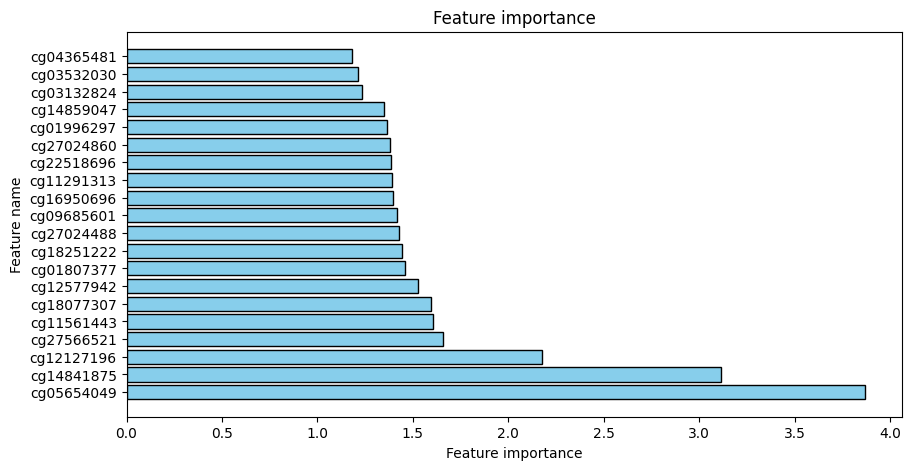

In [63]:
# 绘制CatBoost模型特征重要性柱形图
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Feature importance')
plt.barh(np.arange(1,21), Feature_importance_Cat.iloc[:20,1],color='skyblue', edgecolor='black')
plt.ylabel('Feature name')  
plt.xlabel('Feature importance')
plt.yticks(np.arange(1,21),Feature_importance_Cat.iloc[:20,0])
plt.show()

提取XGBoost模型前20个特征构建SHAP

In [65]:
from pandas import DataFrame
Feature_importance=DataFrame()
Feature_importance['fearure names']=Data_train_class.columns    #特征列表
Feature_importance['fearure importance']=Model_XGB_Class.feature_importances_    #特征重要性评分
Feature_importance=Feature_importance.sort_values('fearure importance',ascending=False)    #按照降序排序

In [66]:
Feature_list=list(Feature_importance.iloc[:20,0])
Feature_Data=DiseaseData_CNN.loc[:,Feature_list]
Feature_traindata,Feature_testdata,Feature_trainlabel,Feature_testlabel=train_test_split(Feature_Data,DiseaseType_CNN,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Feature_traindata.shape,Feature_testdata.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Feature_trainlabel.shape,Feature_testlabel.shape)) 

训练集数据规模为:(1966, 20),测试集数据规模为:(492, 20)
训练集标签规模为:(1966,),测试集标签规模为:(492,)


In [67]:
#训练XGBoost模型
Feature_XGB=xgboost.XGBClassifier(booster='gbtree',n_estimators=800,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Feature_XGB.fit(Feature_traindata,Feature_trainlabel)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [68]:
Model_Evaluate(Feature_XGB,Feature_traindata,Feature_trainlabel,Feature_testdata,Feature_testlabel)

模型训练准确率为:0.9893184130213631,召回率为:0.9893184130213631,f1分数为:0.9893184130213631,精度为:0.9893184130213631
模型测试准确率为:0.7540650406504065,召回率为:0.7540650406504065,f1分数为:0.7540650406504065,精度为:0.7540650406504065
模型训练误差:0.010681586978636859,测试误差:0.24593495934959353
----------------------训练数据集分类评估结果----------------------
                      precision    recall  f1-score   support

             control       0.99      0.99      0.99       965
   Alzheimer disease       0.99      0.98      0.99       118
      Graves disease       1.00      1.00      1.00        23
  Huntington disease       1.00      1.00      1.00        17
  Parkinsons disease       0.98      0.98      0.98       575
rheumatoid arthritis       1.00      1.00      1.00        24
       schizophrenia       1.00      1.00      1.00       140
    Sjogren syndrome       1.00      1.00      1.00        36
              stroke       1.00      1.00      1.00        40
     type 2 diabetes       1.00      1.00      1.00        28

       

In [ ]:
pip install shap

In [69]:
import shap
Explainer=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values=Explainer.shap_values(Feature_traindata)    #计算训练shap值

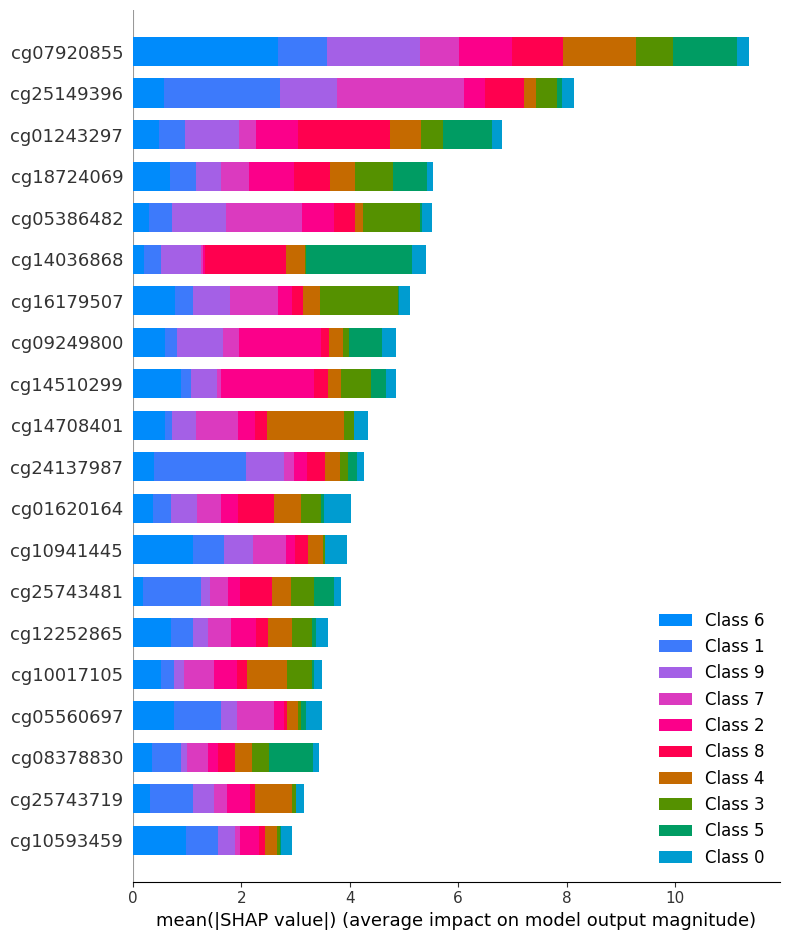

In [70]:
shap.summary_plot(shap_values,Feature_traindata)    #全局特征SHAP分布(训练)

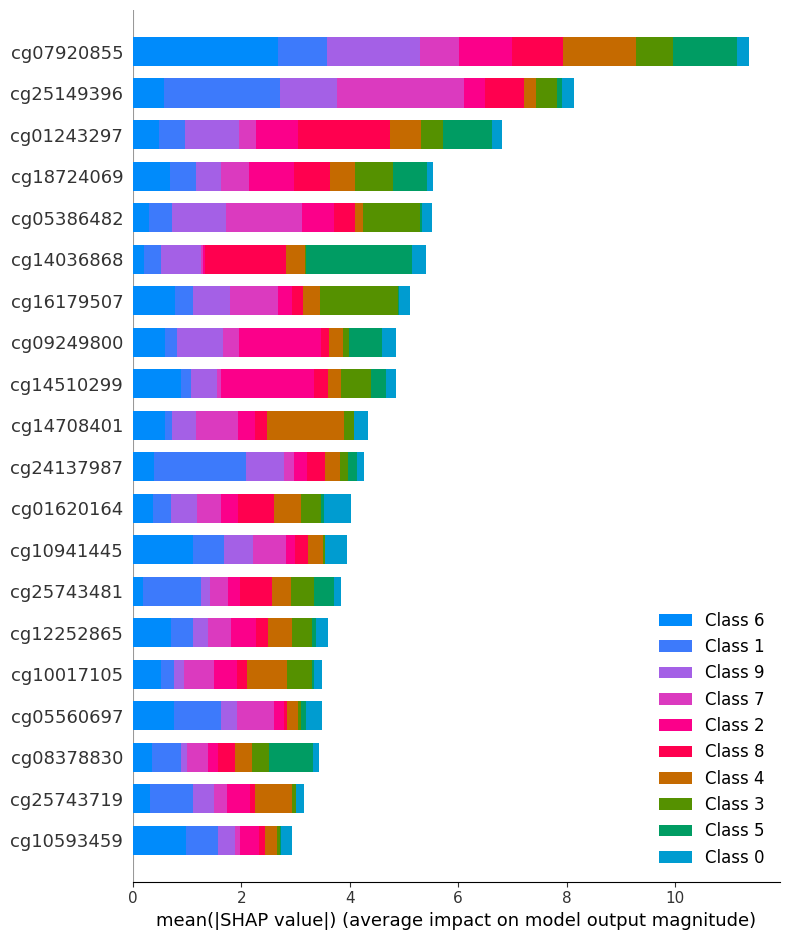

In [71]:
shap.summary_plot(shap_values,Feature_traindata,plot_type='bar')    #特征重要性堆叠图(训练)

In [73]:
Explainer_test=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values_test=Explainer_test.shap_values(Feature_testdata)    #计算测试shap值

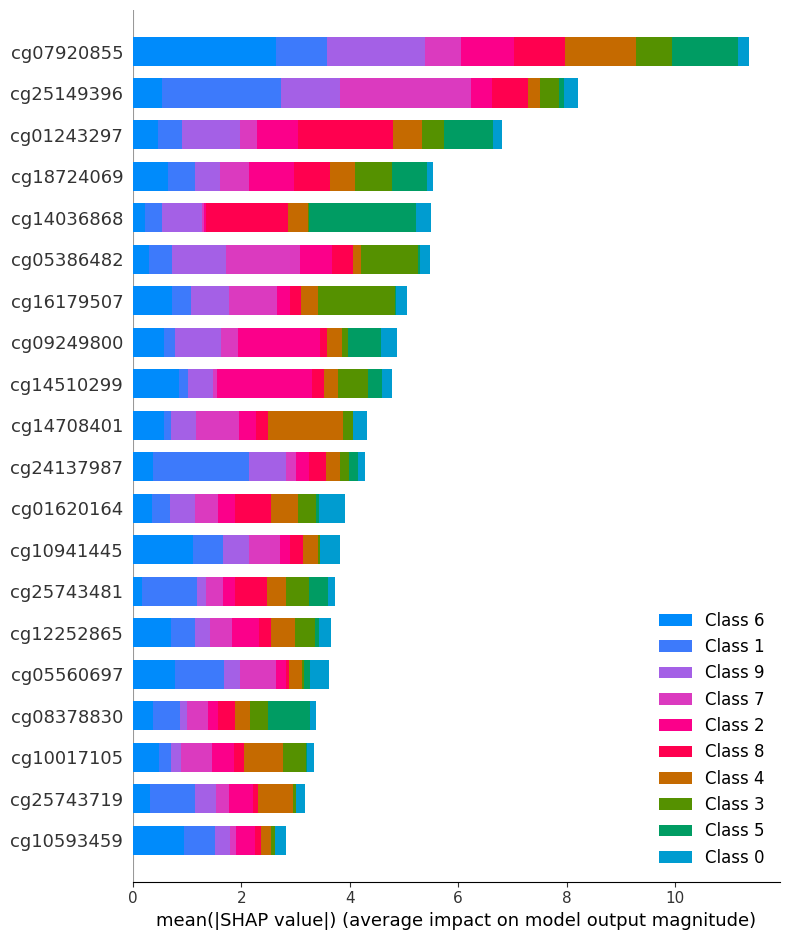

In [74]:
shap.summary_plot(shap_values_test,Feature_testdata)    #全局特征SHAP分布(测试)

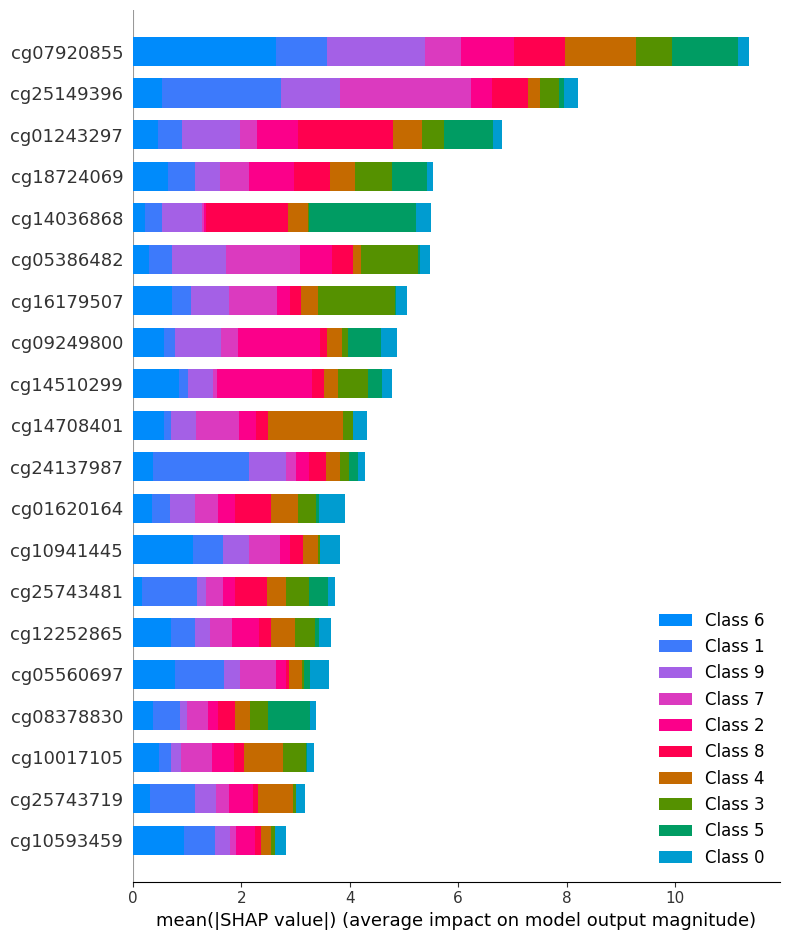

In [75]:
shap.summary_plot(shap_values_test,Feature_testdata,plot_type='bar')    #特征重要性堆叠图(测试)

In [76]:
#构建数据子集
Featute_Data=Feature_list+['gender','sample_type','disease','disease_encode','sample_type_encode','gender_encode']
ClassData=traindata.loc[:,Featute_Data]
ClassData.head(10)

cg10017105  cg14708401  cg25149396  cg24137987  cg07920855  cg10941445   
0   -0.434629         0.0   -2.152700   -2.942546   -3.149987    0.875837  \
1   -0.172391         0.0   -2.030118   -2.861514   -3.076403    0.804620   
2    0.156286         0.0   -1.831393   -3.406479   -3.007447    0.434629   
3    0.180452         0.0   -2.030118   -3.149987   -2.842141    1.035353   
4   -0.468282         0.0   -2.110522   -3.149987   -3.124904    0.781312   
5   -0.031996         0.0   -2.089945   -3.439160   -2.985388    0.623305   
6   -0.092047         0.0   -2.030118   -3.007447   -3.052934    0.919582   
7   -0.084033         0.0   -1.972920   -3.439160   -2.963760    1.125184   
8    0.257360         0.0   -2.253116   -3.149987   -3.175661    0.699002   
9   -0.164336         0.0   -2.324893   -3.228904   -3.284902    0.676546   

   cg12252865  cg25743481  cg01620164  cg09249800  ...  cg08378830   
0   -1.585160   -2.861514    0.818704    3.580953  ...    0.326813  \
1   -1.650305   -3.228904    0.579585    3.619579  ...    0.148241   
2   -1.687774   -2.785946    0.180452    3.228904  ...    0.355631   
3   -2.241551   -3.228904    0.368026    4.402578  ...    0.832866   
4   -1.823018   -3.284902    0.842351    3.124904  ...    0.767424   
5   -2.089945   -3.228904    0.216802    3.052934  ...    0.480968   
6   -1.814692   -2.664729    1.247949    3.228904  ...    1.125184   
7   -1.814692   -2.881228   -0.072017    3.256540  ...    0.510719   
8   -1.865415   -2.942546    0.583932    3.343970  ...    0.241113   
9   -2.312634   -2.921730   -0.092047    2.861514  ...    0.447220   

   cg05560697  cg14036868  cg10593459  gender     sample_type   
0   -3.701353   -4.807960    4.112908       F  disease tissue  \
1   -3.659672   -3.790034    3.837361       F  disease tissue   
2   -2.555085   -2.842141    3.938986       F  disease tissue   
3   -3.507691   -2.632328    3.886935       F  disease tissue   
4   -3.790034   -3.619579    3.744756       M  disease tissue   
5   -3.314031   -3.744756    4.247583       M  disease tissue   
6   -3.439160   -3.100385    3.507691       F  disease tissue   
7   -3.201956   -3.543689    3.507691       M  disease tissue   
8   -3.175661   -4.051632    3.406479       F  disease tissue   
9   -2.823096   -3.659672    3.374769       M  disease tissue   

               disease  disease_encode  sample_type_encode  gender_encode  
0  Alzheimer's disease               1                   1            0.0  
1  Alzheimer's disease               1                   1            0.0  
2  Alzheimer's disease               1                   1            0.0  
3  Alzheimer's disease               1                   1            0.0  
4  Alzheimer's disease               1                   1            1.0  
5  Alzheimer's disease               1                   1            1.0  
6  Alzheimer's disease               1                   1            0.0  
7  Alzheimer's disease               1                   1            1.0  
8  Alzheimer's disease               1                   1            0.0  
9  Alzheimer's disease               1                   1            1.0  

[10 rows x 26 columns]

In [ ]:
pip install openpyxl

In [77]:
ClassData.to_excel('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/ClassDisease_FeatureData.xlsx','UTF-8')